In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'lowgr_tng100B_099S_0A_800R/results/'
hisubfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hiptlfile = pkl.load(open(path + 'hiptlXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
vnfile = pkl.load(open(path + 'vnXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

flib_og = FigureLibrary()
flib_og.addResults(hisubfile)
flib_og.addResults(vnfile)
flib_og.addResults(hiptlfile)

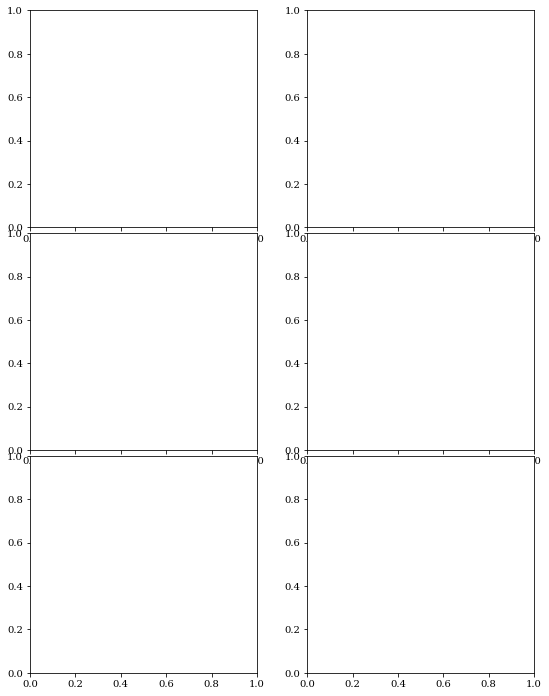

In [151]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 2, panel_bt = [1, 0.1])
fig, panels = flib.getFig()
dim = flib.getDim()
figarr = np.empty(dim, dtype = object)

In [152]:
# making panel 0,0 results
idx = (0,0)
ipog = {}
ipog['color_cut'] = '0.60'
ipog['gal_res'] = 'diemer'
ipog['HI_res'] = 'diemer'
ipog['species'] = 'stmass'
# ipog['is_auto'] = 'False'

ipog['color'] = ['red', 'blue']
ipog['space'] = 'real'
real = flib.getMatchingResults(ipog, {})
figarr[idx] = real

# making panel 0, 1 results
idx = (1,0)

ipog['fieldname'] = ['hiptl', 'vn']
ipog['space'] = 'redshift'
figarr[idx] = flib.getMatchingResults(ipog, {})

# making panel 0, 2 results

idx = (2,0)
ipog['fieldname'] = ['hisubhalo']
figarr[idx] = flib.getMatchingResults(ipog, {})




In [153]:
# making 1, 0; the blue/red - all ratio
results = []
for num in figarr[0,0]:
    
    ip = copy.copy(num.props)
    if 'blue' in ip['color']:
        ip['color'] = 'red'
        ip['fieldname'] = ip['fieldname'][0]
        del ip['result_runtime']
        denom = flib.getMatchingResults(ip, {})
    #     print(len(denom))
    #     print(denom[1].props)
        pr = PostResult()
        pr.computeRatio(num, denom[0])
        results.append(pr)
idx = (0, 1)
figarr[idx] = results

In [154]:
# making 1, 1 particle RSD
results = []
for num in figarr[1, 0]:
    ip = copy.copy(num.props)
    del ip['result_runtime']
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    denom = flib.getMatchingResults(ip, {})
    print(len(denom))
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (1, 1)
figarr[idx] = results

1
1
1
1
1
1
1
1
1
1


In [155]:
# making 1, 2 galaxy RSD
results = []
for num in figarr[2, 0]:
    ip = copy.copy(num.props)
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    del ip['result_runtime']

    denom = flib.getMatchingResults(ip, {})
    print(len(denom))
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (2, 1)
figarr[idx] = results

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [156]:
for i in range(dim[0]):
    for j in range(dim[1]):
        print(len(figarr[i, j]))

28
14
10
10
18
18


In [157]:
flib.setResultArray(figarr, '', '', 'color')

In [158]:
facecolors = ['gray', 'olive', 'tan']
for i in range(len(facecolors)):
    facecolors[i] = mpl.colors.to_rgba(facecolors[i], 0.3)

facecolors
    
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        print(idx)
        fill_kwargs = {'color':'blue'}
        fill_kwargs = {'alpha':0.5}
        panels[idx].set_facecolor(facecolors[i])
        if not idx == (0,1):
            fill_kwargs['label'] = 'HI-Blue Galaxy'
            flib.plotFill(idx, {'color':'blue'},
                         fill_kwargs = fill_kwargs)
            
            fill_kwargs['label'] = 'HI-Red Galaxies'

            fill_kwargs['color'] = 'red'
            flib.plotFill(idx, {'color':'red'},
                         fill_kwargs = fill_kwargs)
        else:
            fill_kwargs['label'] = r'P$_{\rm{blue}}$(k)/P$_{\rm{red}}$(k)'
            fill_kwargs['color'] = 'purple'
            flib.plotFill(idx, {'color':'blue'},
                         fill_kwargs = fill_kwargs)
        if j ==1:
            p = panels[idx]
            xlim = p.get_xlim()
            
            p.plot(xlim, [1, 1], color='k', linestyle = '--')
# figarr[]

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)


In [161]:
ratio_panels = [(i, 1) for i in range(3)]

# axes
flib.xLimAdjustToNyquist(5)
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panels)
# flib.matchAxisLimits()

# ticks
tickkwargs = {'labelsize':12}
# flib.removeYTickLabels(panel_exceptions = ratio_panels + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
# flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)
flib.removeXTickLabels()
# labels
lkw = {}
lkw['fontsize'] = 12
lkw['loc'] = 'lower left'
flib.addLegend(kwargs = lkw)
lkw['loc'] = 'upper left'
flib.addLegend((0,1), lkw)
labkw = {}
labkw['fontsize'] = 14
labkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = labkw)
labkw['rotation'] = 'horizontal'
flib.axisLabel('x', txt_kwargs = labkw)

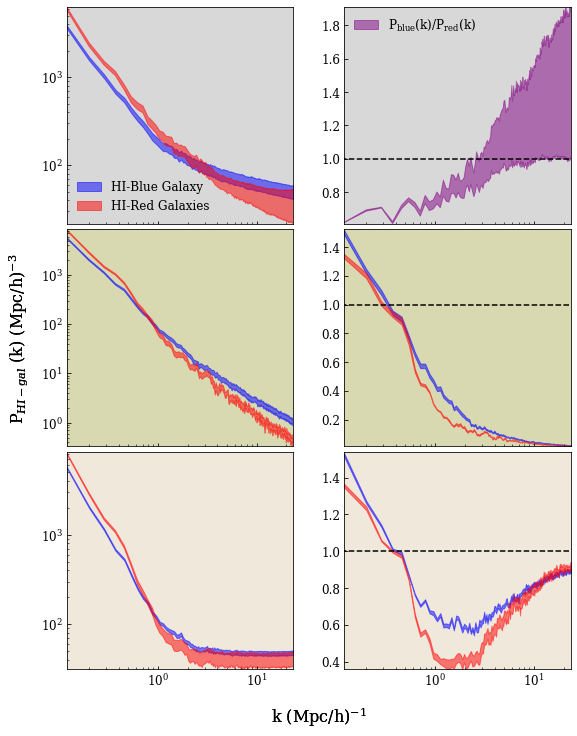

In [162]:
fig

In [28]:
numerators = copy.copy(figarr[0, 0])
numerators.extend(copy.copy(figarr[0, 1]))
numerators.extend(copy.copy(figarr[0, 2]))

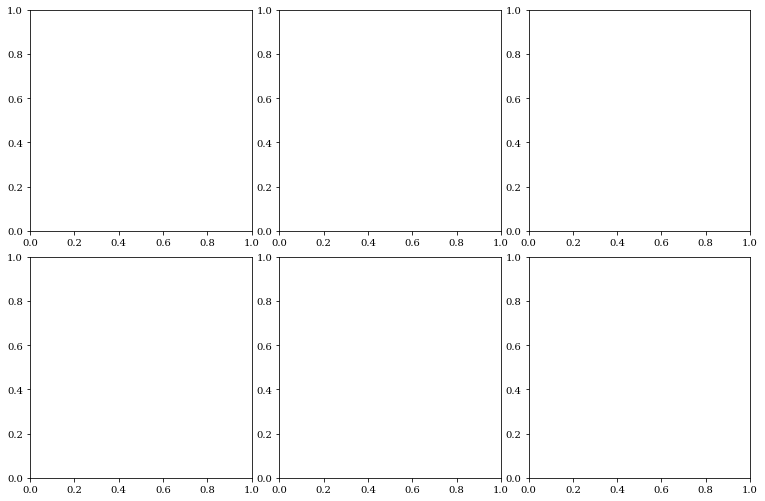

In [29]:
# Deconstructing the blue/red ratio panel
flib = copy.copy(flib_og)
flib.createFigGrid(2, 3, panel_bt = 0.5)
fig, panels = flib.getFig()
dim = flib.getDim()
figarr = np.empty(dim, dtype = object)

In [30]:
# making 0, 0; the blue/red - all ratio
results = []
for num in numerators:
    ip = copy.copy(num.props)
    ip['color'] = 'resolved'
    ip['color_cut'] = 'None'
    ip['fieldname'] = ip['fieldname'][0]
    del ip['result_runtime']
    denom = flib.getMatchingResults(ip, {})
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (0, 0)
figarr[idx] = results


In [34]:
results = []
for num in numerators:
    ip = copy.copy(num.props)
    if 'red' in ip['color']:
        ip['color'] = 'blue'
    
        ip['fieldname'] = ip['fieldname'][0]
        del ip['result_runtime']
        denom = flib.getMatchingResults(ip, {})
        print(num.props['color'], denom[0].props['color'])
        pr = PostResult()
        pr.computeRatio(num, denom[0])
        results.append(pr)
    
idx = (0, 0)
figarr[idx] = results

['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']
['red'] ['blue']


In [32]:
flib.setResultArray(figarr, '', '', 'color')

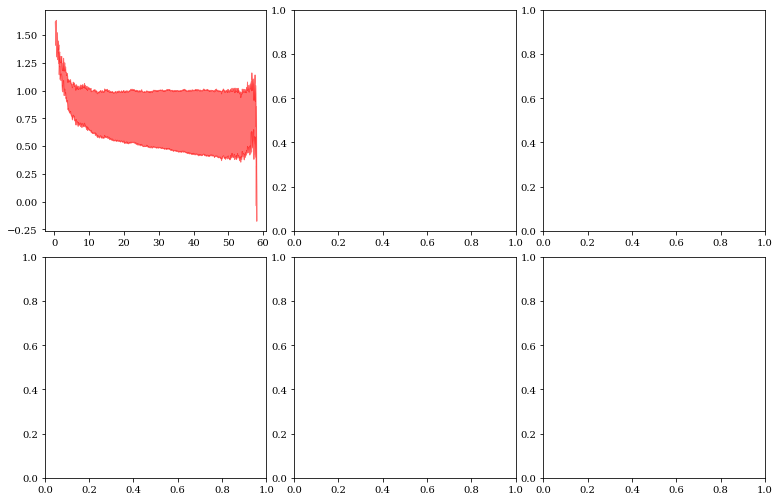

In [33]:
# make 0,0 plot
iprops = {}
iprops['space'] = 'real'
iprops['color'] = 'red'
fargs = {}
fargs['color'] = 'red'
fargs['label'] = 'Red Galaxies'
flib.plotFill((0,0), iprops, fill_kwargs = fargs)
fig

In [82]:

# axes
flib.xLimAdjustToNyquist(10)
flib.flushYAxisToData()
flib.logAxis('x')
# flib.logAxis('y', panel_exceptions = ratio_panels)
flib.matchAxisLimits()

# ticks
tickkwargs = {}
# flib.removeYTickLabels(panel_exceptions = ratio_panels + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.changeTickParams(tickkwargs)
flib.removeDefaultTickLabels()

# labels


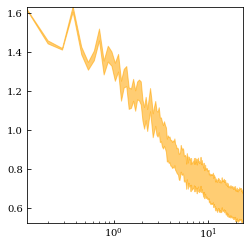

In [83]:
fig